In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import plotly.express as px

# Importando os dados do arquivo para uma matriz do pandas

In [6]:
dados = pd.read_csv('data.csv')

In [7]:
dados #Visualizando a tabela

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


Dados de Puncao Aspiratoria por Agulha Fina (PAAF - FNA) de massa mamaria.
<br>
Os dados descrevem as caracteristicas dos nucleos celulares presentes.
<br>
Perguntas:
<br>
1) Como se apresenta esse dado?<br>
2) As caracteristicas nucleares apontam diferencas entre os grupos considerados malignos e benignos?<br>
3) Essas diferencas sao significativas por P-value?<br>
4) Essas diferencas continuam significativas apos ajustar para FDR?<br>
5) Quais as caracteristicas que melhor representam os dados malignos?<br>


# Visualizando os dados

In [8]:
#Como estao dispostos os dados da matriz?
dados.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
dados.index


RangeIndex(start=0, stop=569, step=1)

In [13]:
dados.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Graficamente, como se apresentam os dados?

(array([ 19.,  79., 185., 129.,  55.,  50.,  38.,   7.,   4.,   3.]),
 array([ 6.981 ,  9.0939, 11.2068, 13.3197, 15.4326, 17.5455, 19.6584,
        21.7713, 23.8842, 25.9971, 28.11  ]),
 <a list of 10 Patch objects>)

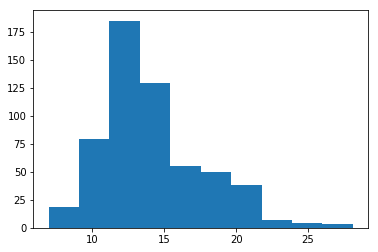

In [16]:
plt.hist(dados.radius_mean)

(array([ 17.,  96., 154., 145.,  89.,  40.,  21.,   4.,   2.,   1.]),
 array([ 9.71 , 12.667, 15.624, 18.581, 21.538, 24.495, 27.452, 30.409,
        33.366, 36.323, 39.28 ]),
 <a list of 10 Patch objects>)

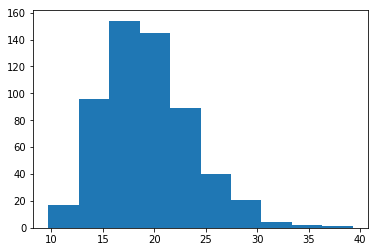

In [17]:
plt.hist(dados.iloc[:,3]) #Utilizando o indice ao inves de chamar o nome do atributo.

Vamos verificar se o grupo de dados de tumores malignos se diferencia dos tumores benignos, ainda no histograma.

In [29]:
fig = px.histogram(dados, x="radius_mean", color="diagnosis")
fig.show()

In [30]:
fig = px.histogram(dados, x="perimeter_mean", color="diagnosis")
fig.show()

In [31]:
fig = px.histogram(dados, x="area_mean", color="diagnosis")
fig.show()

In [32]:
fig = px.histogram(dados, x="texture_mean", color="diagnosis")
fig.show()

In [28]:
fig = px.histogram(dados, x="smoothness_mean", color="diagnosis")
fig.show()

Essa diferenciacao se repete nos demais atributos?

In [26]:
fig = px.histogram(dados, x="concavity_mean", color="diagnosis")
fig.show()

In [27]:
fig = px.histogram(dados, x="symmetry_mean", color="diagnosis")
fig.show()

Nucleos celulares de ambos grupos se sobrepoem na maioria dos atributos. As excecoes sao atributos relacionados ao tamanho do corpo celular, como raio, perimetro e area do tumor.<br>
Serao essas diferencas estatisticamente significativas?

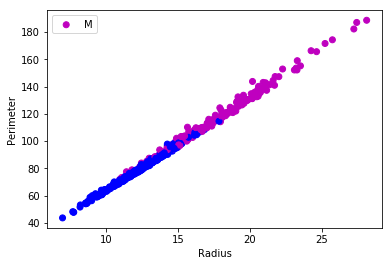

In [43]:
#Utilizando a razao entre raio e perimetro para visualizar a diferenciacao dos grupos.

plt.scatter(dados.radius_mean, dados.perimeter_mean, color = dados.diagnosis)
plt.xlabel('Radius')
plt.ylabel('Perimeter')
plt.legend(dados.diagnosis)
plt.show()

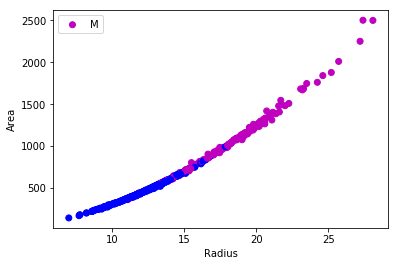

In [42]:
plt.scatter(dados.radius_mean, dados.area_mean, color = dados.diagnosis)
plt.xlabel('Radius')
plt.ylabel('Area')
plt.legend(dados.diagnosis)
plt.show()

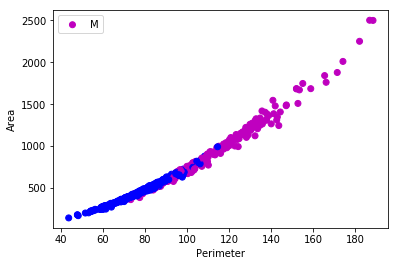

In [41]:
plt.scatter(dados.perimeter_mean, dados.area_mean, color = dados.diagnosis)
plt.xlabel('Perimeter')
plt.ylabel('Area')
plt.legend(dados.diagnosis)
plt.show()

A razao entre atributos de area e superficie e obvia, mas sera que existem outras correlacoes entre os atributos celulares/tumorais?

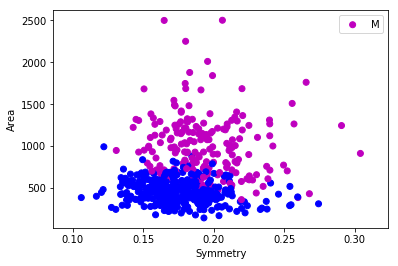

In [39]:
plt.scatter(dados.symmetry_mean, dados.area_mean, color = dados.diagnosis)
plt.xlabel('Symmetry')
plt.ylabel('Area')
plt.legend(dados.diagnosis)
plt.show()

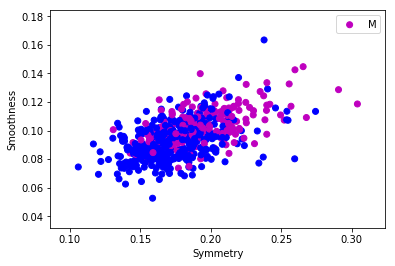

In [38]:
plt.scatter(dados.symmetry_mean, dados.smoothness_mean, color = dados.diagnosis)
plt.xlabel('Symmetry')
plt.ylabel('Smoothness')
plt.legend(dados.diagnosis)
plt.show()

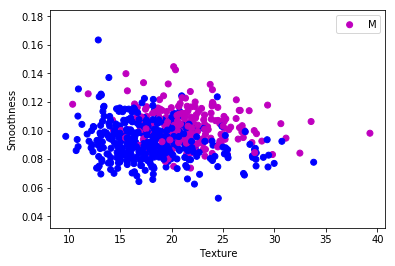

In [44]:
plt.scatter(dados.texture_mean, dados.smoothness_mean, color = dados.diagnosis)
plt.xlabel('Texture')
plt.ylabel('Smoothness')
plt.legend(dados.diagnosis)
plt.show()

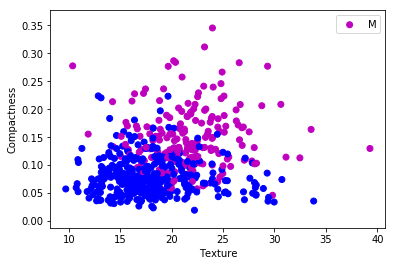

In [46]:
plt.scatter(dados.texture_mean, dados.compactness_mean, color = dados.diagnosis)
plt.xlabel('Texture')
plt.ylabel('Compactness')
plt.legend(dados.diagnosis)
plt.show()

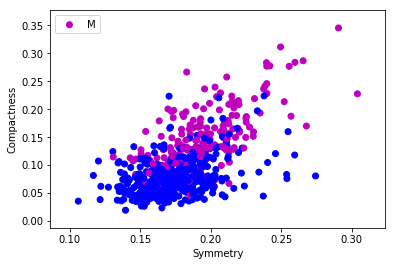

In [47]:
plt.scatter(dados.symmetry_mean, dados.compactness_mean, color = dados.diagnosis)
plt.xlabel('Symmetry')
plt.ylabel('Compactness')
plt.legend(dados.diagnosis)
plt.show()

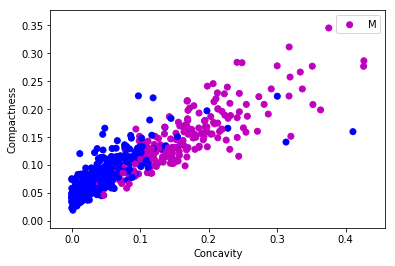

In [48]:
plt.scatter(dados.concavity_mean, dados.compactness_mean, color = dados.diagnosis)
plt.xlabel('Concavity')
plt.ylabel('Compactness')
plt.legend(dados.diagnosis)
plt.show()

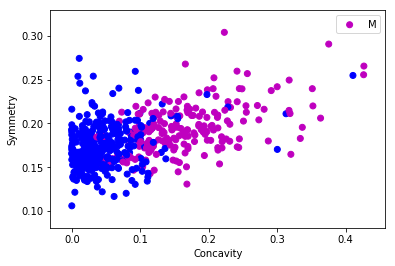

In [49]:
plt.scatter(dados.concavity_mean, dados.symmetry_mean, color = dados.diagnosis)
plt.xlabel('Concavity')
plt.ylabel('Symmetry')
plt.legend(dados.diagnosis)
plt.show()

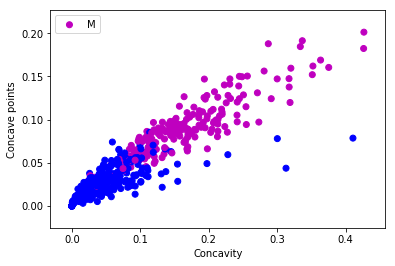

In [53]:
plt.scatter(dados.concavity_mean, dados.iloc[:,9], color = dados.diagnosis)
plt.xlabel('Concavity')
plt.ylabel('Concave points')
plt.legend(dados.diagnosis)
plt.show()

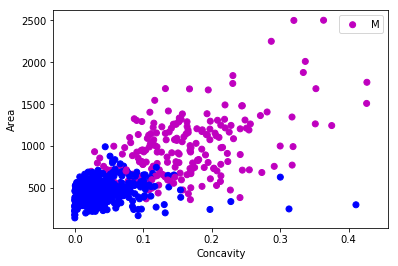

In [50]:
plt.scatter(dados.concavity_mean, dados.area_mean, color = dados.diagnosis)
plt.xlabel('Concavity')
plt.ylabel('Area')
plt.legend(dados.diagnosis)
plt.show()

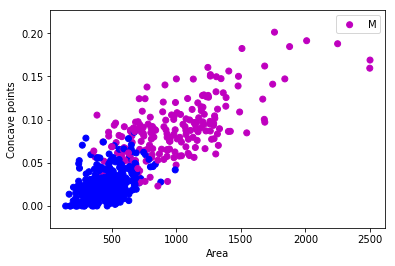

In [54]:
plt.scatter(dados.area_mean, dados.iloc[:,9], color = dados.diagnosis)
plt.xlabel('Area')
plt.ylabel('Concave points')
plt.legend(dados.diagnosis)
plt.show()

Aparentemente existem correlacoes entre o numero e grau de concavidade e a area, perimetro e raio (tamanho) do tumor e a condicao de ser maligno. Essa relacao e reportada em diversos artigos.

Conseguimos, com isso, entender um pouco mais dos dados apenas olhando para sua distribuicao.<br>
A seguir vamos analisar se essas diferencas entre os dois grupos e significativa.

In [18]:
colunas = []
for col in dados.columns:
    print(col)
    colunas.append(col)

id
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
Unnamed: 32
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 

In [22]:
dados.sort_values('radius_mean')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
101,862722,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.000000,0.000000,...,19.54,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382,NaN
539,921362,B,7.691,25.44,48.34,170.4,0.08668,0.11990,0.092520,0.013640,...,31.89,54.49,223.6,0.15960,0.30640,0.33930,0.05000,0.2790,0.10660,NaN
538,921092,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.000000,0.000000,...,30.92,57.17,248.0,0.12560,0.08340,0.00000,0.00000,0.3058,0.09938,NaN
568,92751,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.000000,0.000000,...,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039,NaN
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,NaN
151,871001502,B,8.219,20.70,53.27,203.9,0.09405,0.13050,0.132100,0.021680,...,29.72,58.08,249.8,0.16300,0.43100,0.53810,0.07879,0.3322,0.14860,NaN
525,91805,B,8.571,13.10,54.53,221.3,0.10360,0.07632,0.025650,0.015100,...,18.45,63.30,275.6,0.16410,0.22350,0.17540,0.08512,0.2983,0.10490,NaN
314,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.000000,0.000000,...,22.44,56.65,240.1,0.13470,0.07767,0.00000,0.00000,0.3142,0.08116,NaN
61,858981,B,8.598,20.98,54.66,221.8,0.12430,0.08963,0.030000,0.009259,...,27.04,62.06,273.9,0.16390,0.16980,0.09001,0.02778,0.2972,0.07712,NaN
59,858477,B,8.618,11.79,54.34,224.5,0.09752,0.05272,0.020610,0.007799,...,15.40,59.90,274.9,0.17330,0.12390,0.11680,0.04419,0.3220,0.09026,NaN
